Оптимальний результат: 40.0, 
ШЛЯХ:
Лунка 7
-> Лунка 1
-> Лунка 6
-> Лунка 4
-> Лінка 2
-> Лунка 3
-> Лунка 5
-> Лунка 7


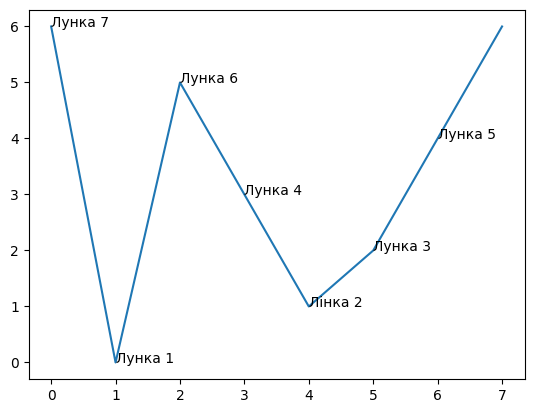

In [2]:
import math
import random
import matplotlib.pyplot as pl

# file with input data
from data import (
    Ukraine_dis,
    Ukraine_map,
    manager_map,
    manager_dis,
    list_map,
    list_dis,
    fish_map,
    fish_dis,
)

# variables
variant = 7  # номер варіанта за журналом
alpha = 1.0
beta = 5.0
rho = 0.5  # P
Q = 10
iterations = 10000

mapping = fish_map # cities names
object_count = len(mapping)
distances = fish_dis  # distance
y = list()  # graphic for best way


class Ant:
    def __init__(self, parent):
        self.parent = parent
        self.position = variant - 1
        self.start = self.position
        self.totalDist = 0.0
        self.tList = [self.position]
        self.myPheromone = []

    def travel(self):
        if len(self.tList) == object_count:
            self.tList.remove(self.start)

        p_array = [0 for _ in range(object_count)]
        summa = 0
        # formula for counting probability of visiting the following points
        for i in range(object_count):
            if i not in self.tList:
                summa += (self.parent.pheromones[self.position][i] ** alpha) * (
                    self.parent.visibility[self.position][i] ** beta
                )
        for i in range(object_count):
            if i not in self.tList:
                try:
                    p_array[i] = (
                        (self.parent.pheromones[self.position][i] ** alpha)
                        * (self.parent.visibility[self.position][i] ** beta)
                        / summa
                    )
                except:
                    pass
        revers = list(
            filter(lambda p: p not in self.tList, [i for i in range(object_count)])
        )  # check place if city been used for a once
        revers.reverse()
        next_city = revers[0]
        winner_num = random.random() * sum(p_array)  # choosing next point using random
        for i, probability in enumerate(p_array):
            winner_num -= probability
            if winner_num <= 0:
                next_city = i
                break
        newd = distances[self.position][next_city]  # writting in a next city
        self.totalDist += newd if newd > 0 and next_city not in self.tList else math.inf
        self.tList.append(next_city)
        self.position = next_city

    def update_ways(self):  # refreshing pheromone for visiting border
        self.myPheromone = [
            [0.0 for _ in range(object_count)] for __ in range(object_count)
        ]
        for i in range(1, len(self.tList)):
            k = self.tList[i - 1]
            j = self.tList[i]
            self.myPheromone[k][j] = Q / self.totalDist


class Colony:
    smallestCost = math.inf
    optimal_way = []
    ants = []
    pheromones = None
    visibility = None

    def __init__(self):
        self.pheromones = [
            [1 / (object_count * object_count) for _ in range(object_count)]
            for __ in range(object_count)
        ]  # initial amount of pheromone for the start
        self.visibility = [
            [0 if i == j else 1 / distances[i][j] for i in range(object_count)]
            for j in range(object_count)
        ]  # this is an inverse distance

    def do_main(self):
        self.smallestCost = math.inf
        self.optimal_way = []

        for t in range(iterations):  # main cycle
            self.reload_ants()
            self.move_ants()
            self.update_ways()
            y.append(self.smallestCost)  # graphics data
        return self.smallestCost, self.optimal_way

    def move_ants(self):
        for ant in self.ants:
            for i in range(object_count):
                ant.travel()

            if ant.totalDist < self.smallestCost:  # determine the optimal path
                self.smallestCost = ant.totalDist
                self.optimal_way = [ant.tList[-1]] + ant.tList
            ant.update_ways()

    def update_ways(self):  # evaporate and add pheromones
        for i, row in enumerate(self.pheromones):
            for j, col in enumerate(row):
                self.pheromones[i][j] *= rho
                for ant in self.ants:
                    self.pheromones[i][j] += ant.myPheromone[i][j]

    def reload_ants(self):  # updating agents
        self.ants = [Ant(self) for _ in range(round(object_count * 0.8))]


newLineSymbol = "\n-> "

dist, path = Colony().do_main()
print(
    f"Оптимальний результат: {dist}, \nШЛЯХ:\n{newLineSymbol.join(mapping[i] for i in path)}"
)
pl.figure()
pl.plot(
    [x for x in range(object_count + 1)],
    path,
)
for i, txt in enumerate(mapping):
    pl.annotate(txt, (path.index(i), i))
pl.show()